In [2]:
# importing packages
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# loading dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine =[train_df, test_df]
print('Size of the train dataset', train_df.shape)
print('Size of the test dataset', test_df.shape)

Size of the train dataset (891, 12)
Size of the test dataset (418, 11)


In [4]:
# data description
train_df.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
total = train_df.isnull().sum()
percentage = (train_df.isnull().sum()/train_df.count())*100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage']).sort_values(by ='Total', ascending=False)
missing_data

,Total,Percentage
Cabin,687,336.764706
Age,177,24.789916
Embarked,2,0.224972
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Analyze by pivoting features

In [8]:
train_df[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Survived', 'SibSp']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[['Survived', 'Parch']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


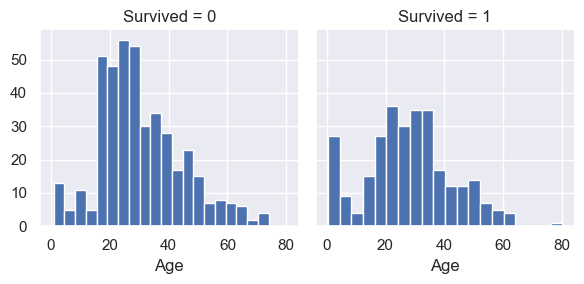

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins =20)

<AxesSubplot: >

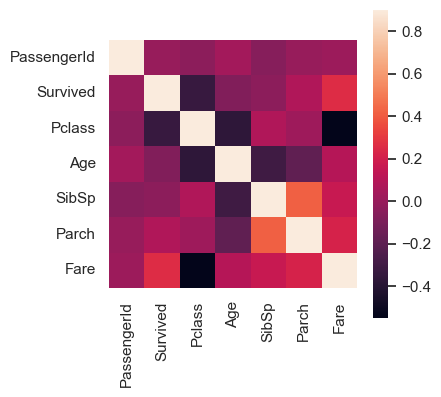

In [13]:
# heatmap for correlation of the variables
cormat = train_df.corr()
f, ax =plt.subplots(figsize = (4, 4))
sns.heatmap(cormat, vmax=0.9, square=True)

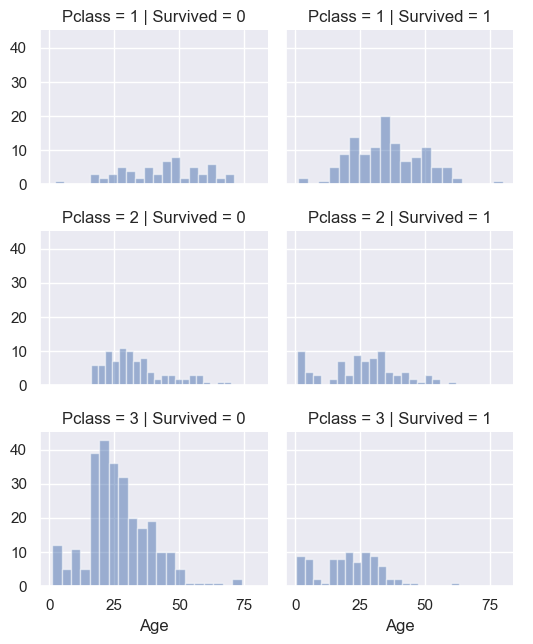

In [14]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height=2.2, aspect=1.2)
grid.map(plt.hist, 'Age', alpha=0.5, bins = 20)
grid.add_legend()

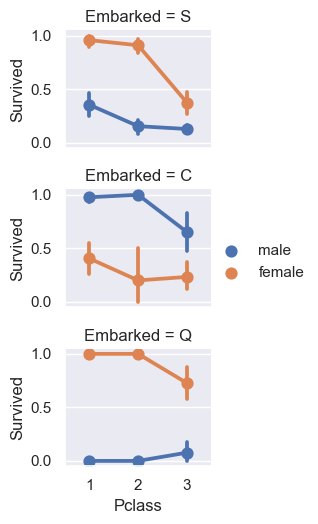

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', height=1.8, aspect=1.4)
grid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

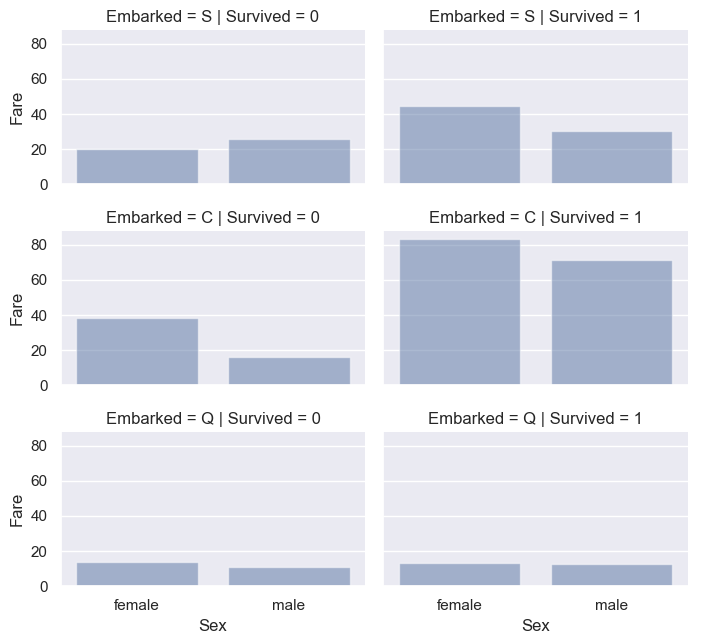

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()